# Lab 7 Tasks

# Task 1 - Cardata.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

%matplotlib inline

In [2]:
df = pd.read_csv('cardata.csv')
print(df.shape)

(11914, 12)


So, there are 11914 rows and 12 columns in the cardata dataset.

Show the first 5 rows of the dataframe:

In [3]:
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven Mode,Number of Doors,highway MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,28,18,3916,34500


**Check the datatypes**

In [4]:
print(df.dtypes)

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven Mode           object
Number of Doors      float64
highway MPG            int64
city mpg               int64
Popularity             int64
Price                  int64
dtype: object


**Check for duplicated rows - if there are, delete them**

In [5]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (886, 12)


Remove 886 rows of duplicate data then count the number of rows:


In [6]:
df = df.drop_duplicates()
df.count()

Make                 11028
Model                11028
Year                 11028
Engine HP            10959
Engine Cylinders     10998
Transmission Type    11028
Driven Mode          11028
Number of Doors      11022
highway MPG          11028
city mpg             11028
Popularity           11028
Price                11028
dtype: int64

**Check if there are null values or missing values**


In [7]:
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven Mode           0
Number of Doors       6
highway MPG           0
city mpg              0
Popularity            0
Price                 0
dtype: int64


**Drop the null values**

In [8]:
df = df.dropna()
print(df.count())
print(df.shape)

Make                 10929
Model                10929
Year                 10929
Engine HP            10929
Engine Cylinders     10929
Transmission Type    10929
Driven Mode          10929
Number of Doors      10929
highway MPG          10929
city mpg             10929
Popularity           10929
Price                10929
dtype: int64
(10929, 12)


**Print a summary for the attribute statistics**

In [9]:
print(df.describe())

               Year     Engine HP  Engine Cylinders  Number of Doors  \
count  10929.000000  10929.000000      10929.000000     10929.000000   
mean    2010.768780    253.367188          5.679477         3.449172   
std        7.144636    109.969181          1.765286         0.875798   
min     1990.000000     55.000000          0.000000         2.000000   
25%     2007.000000    172.000000          4.000000         2.000000   
50%     2015.000000    240.000000          6.000000         4.000000   
75%     2016.000000    303.000000          6.000000         4.000000   
max     2017.000000   1001.000000         16.000000         4.000000   

        highway MPG      city mpg    Popularity         Price  
count  10929.000000  10929.000000  10929.000000  1.092900e+04  
mean      26.336719     19.346875   1557.566932  4.213557e+04  
std        7.489187      6.625464   1448.307334  6.205717e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.0000

**Plot a bar chart for the 'make' variable**

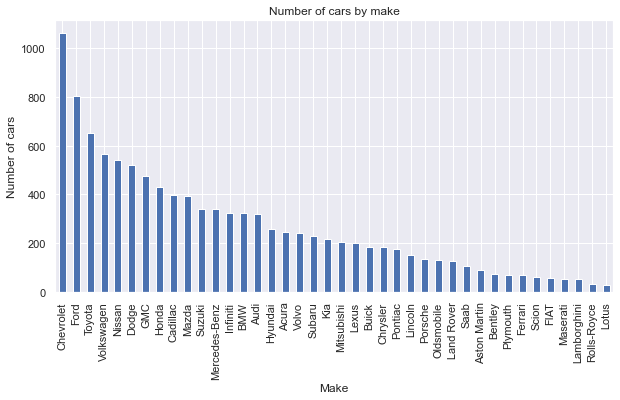

In [11]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel("Number of cars")
plt.xlabel("Make");

**Create a Histogram of Engine HP**

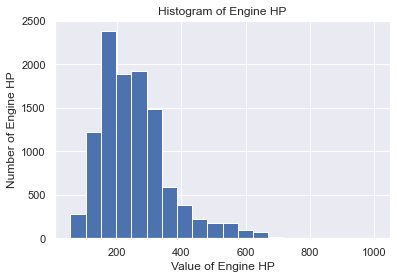

In [12]:
plt.hist(df['Engine HP'], bins=20)
plt.title("Histogram of Engine HP")
plt.ylabel("Number of Engine HP")
plt.xlabel("Value of Engine HP");

**Calculate and visualise correlations using a Seaborn heat map**

                      Year  Engine HP  Engine Cylinders  Number of Doors  \
Year              1.000000   0.327957         -0.037097         0.245177   
Engine HP         0.327957   1.000000          0.788036        -0.136082   
Engine Cylinders -0.037097   0.788036          1.000000        -0.153036   
Number of Doors   0.245177  -0.136082         -0.153036         1.000000   
highway MPG       0.272054  -0.421254         -0.612161         0.120556   
city mpg          0.224110  -0.473772         -0.632701         0.140437   
Popularity        0.085127   0.040507          0.039295        -0.060403   
Price             0.203604   0.660307          0.555170        -0.148377   

                  highway MPG  city mpg  Popularity     Price  
Year                 0.272054  0.224110    0.085127  0.203604  
Engine HP           -0.421254 -0.473772    0.040507  0.660307  
Engine Cylinders    -0.612161 -0.632701    0.039295  0.555170  
Number of Doors      0.120556  0.140437   -0.060403 -0.1483

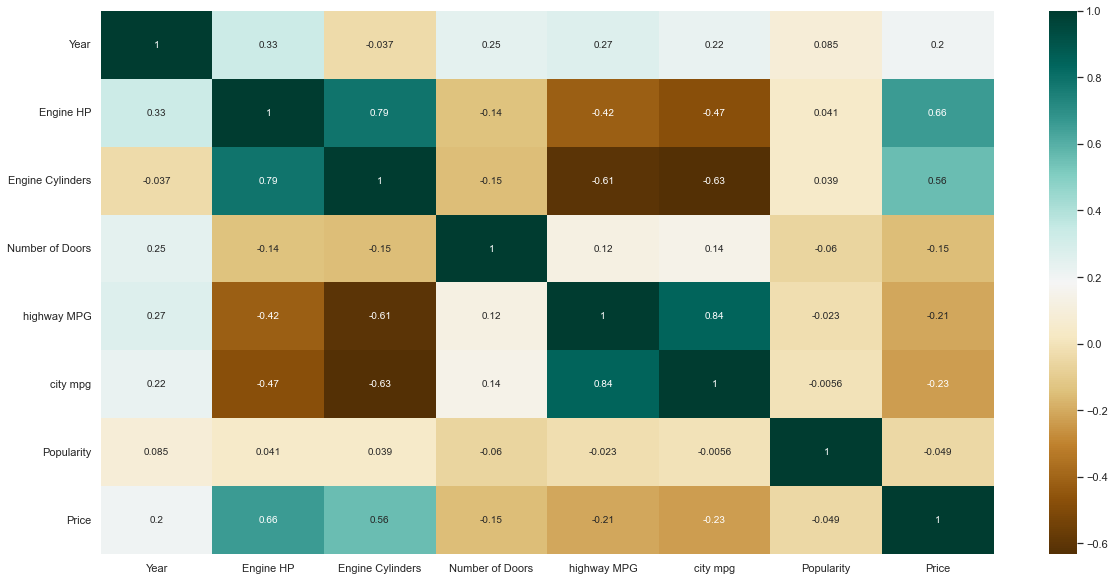

In [13]:
plt.figure(figsize=(20,10))
corl = df.corr()
sns.heatmap(corl, cmap="BrBG", annot=True)
print(corl)

**Create a Scatter Plot**

Plots are plotted between Engine HP and Price

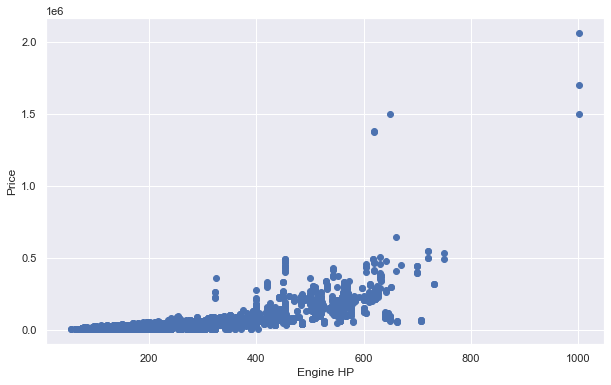

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Engine HP'], df['Price'])
ax.set_xlabel('Engine HP')
ax.set_ylabel('Price')
plt.show()


**Create another Scatter Plot**

Plots are plotted between 'city mpg' and 'highway mpg'

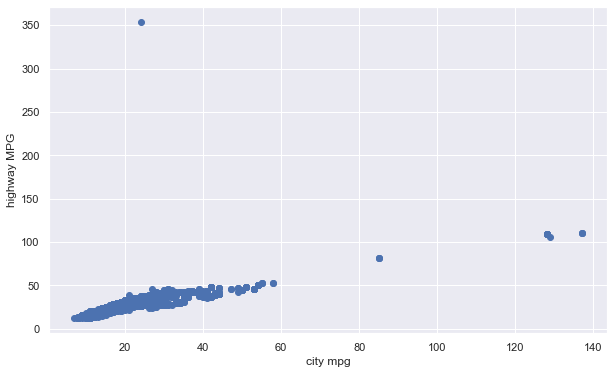

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['city mpg'], df['highway MPG'])
ax.set_xlabel('city mpg')
ax.set_ylabel('highway MPG')
plt.show()


# Task 2 - Diabetes

**Part 1**

Load the ‘diabetes.csv’ dataset into Python as a Pandas DataFrame and check the
number of rows and columns in the dataframe.
(Hint: use the ‘header = None’ parameter in the read_csv function, because column
names are not saved in the data file)

**Imports**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

**Import CSV file into the dataframe and check the amount of rows and columns**

In [68]:
df = pd.read_csv('diabetes.csv', header=None)
print(df.shape)

(768, 9)


Headers:    
• 0. Number of times pregnant.    
• 1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.    
• 2. Diastolic blood pressure (mm Hg).    
• 3. Triceps skinfold thickness (mm).    
• 4. 2-Hour serum insulin (mu U/ml).    
• 5. Body mass index (weight in kg/(height in m)^2).    
• 6. Diabetes pedigree function.    
• 7. Age (years).    
• 8. Class variable (0 or 1).    

In [69]:
df.head(2)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


767 rows and 9 columns.

**Check the datatypes are correct**

In [26]:
print(df.dtypes)

0      int64
1      int64
2      int64
3      int64
4      int64
5    float64
6    float64
7      int64
8      int64
dtype: object


**Display the first 10 tows in the dataframe**

In [27]:
df.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Check for duplicate rows**

In [28]:
duplicate_rows_df = df[df.duplicated()]
print("There are ", duplicate_rows_df.shape, " duplicates.")

There are  (0, 9)  duplicates.


**Drop the duplicates**

In [29]:
df = df.drop_duplicates()
df.count()

0    768
1    768
2    768
3    768
4    768
5    768
6    768
7    768
8    768
dtype: int64

**Print a summary statistics on attributes**

In [31]:
print(df.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

**Check for nulls**

In [30]:
print(df.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


Zero nulls, all is well in love and war.

**Check for '0' values - these are effectively nulls**

In [33]:
print((df[[1,2,3,4,5]] == 0).sum())

1      5
2     35
3    227
4    374
5     11
dtype: int64


**Replace '0' values with 'NaN', so they can be removed**

In [77]:
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.NaN)
print(df.isnull().sum())
print(df.head(10))

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64
    0      1     2     3      4     5      6   7  8
0   6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1   1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2   8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3   1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4   0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5   5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6   3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7  10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8   2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9   8  125.0  96.0   NaN    NaN   NaN  0.232  54  1


As we can see, '0' values have been replaced with 'NaN'


The simplest strategy for handling missing data is to remove records that contain a
missing value. You can use dropna() to remove all rows with missing data as in task
1. However, normally, this method is use only when the percentage of samples with
missing values is low (i.e., less than 5%). If the missing value percentage is high,
imputation could be a better option.

**Fill the missing values with the mean column values**    
**Check if there are still any NaN's in the DF**    
**Check the imputed 10 rows of data**    

In [78]:
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())
print(df.head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
    0      1          2         3           4          5      6   7  8
0   6  148.0  72.000000  35.00000  155.548223  33.600000  0.627  50  1
1   1   85.0  66.000000  29.00000  155.548223  26.600000  0.351  31  0
2   8  183.0  64.000000  29.15342  155.548223  23.300000  0.672  32  1
3   1   89.0  66.000000  23.00000   94.000000  28.100000  0.167  21  0
4   0  137.0  40.000000  35.00000  168.000000  43.100000  2.288  33  1
5   5  116.0  74.000000  29.15342  155.548223  25.600000  0.201  30  0
6   3   78.0  50.000000  32.00000   88.000000  31.000000  0.248  26  1
7  10  115.0  72.405184  29.15342  155.548223  35.300000  0.134  29  0
8   2  197.0  70.000000  45.00000  543.000000  30.500000  0.158  53  1
9   8  125.0  96.000000  29.15342  155.548223  32.457464  0.232  54  1


**Plot a histogram showing plasma glucose concentration with an index of 1**

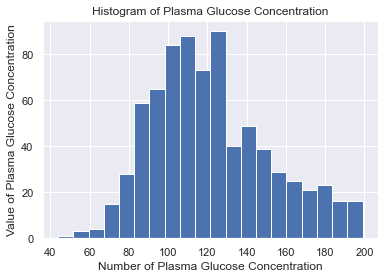

In [79]:
plt.figure(0)
plt.hist(df[1], bins=20)
plt.title("Histogram of Plasma Glucose Concentration")
plt.xlabel('Number of Plasma Glucose Concentration')
plt.ylabel('Value of Plasma Glucose Concentration');

**Plot a histogram showing the Body Mass Index, with an index of 5**

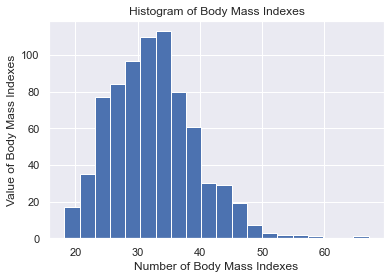

In [80]:
plt.figure(0)
plt.hist(df[5], bins=20)
plt.title("Histogram of Body Mass Indexes")
plt.xlabel('Number of Body Mass Indexes')
plt.ylabel('Value of Body Mass Indexes');

**Calculate and visualize correlations using a head map**

          0         1         2         3         4         5         6  \
0  1.000000  0.127911  0.208522  0.082989  0.056027  0.021565 -0.033523   
1  0.127911  1.000000  0.218367  0.192991  0.420157  0.230941  0.137060   
2  0.208522  0.218367  1.000000  0.192816  0.072517  0.281268 -0.002763   
3  0.082989  0.192991  0.192816  1.000000  0.158139  0.542398  0.100966   
4  0.056027  0.420157  0.072517  0.158139  1.000000  0.166586  0.098634   
5  0.021565  0.230941  0.281268  0.542398  0.166586  1.000000  0.153400   
6 -0.033523  0.137060 -0.002763  0.100966  0.098634  0.153400  1.000000   
7  0.544341  0.266534  0.324595  0.127872  0.136734  0.025519  0.033561   
8  0.221898  0.492928  0.166074  0.215299  0.214411  0.311924  0.173844   

          7         8  
0  0.544341  0.221898  
1  0.266534  0.492928  
2  0.324595  0.166074  
3  0.127872  0.215299  
4  0.136734  0.214411  
5  0.025519  0.311924  
6  0.033561  0.173844  
7  1.000000  0.238356  
8  0.238356  1.000000  


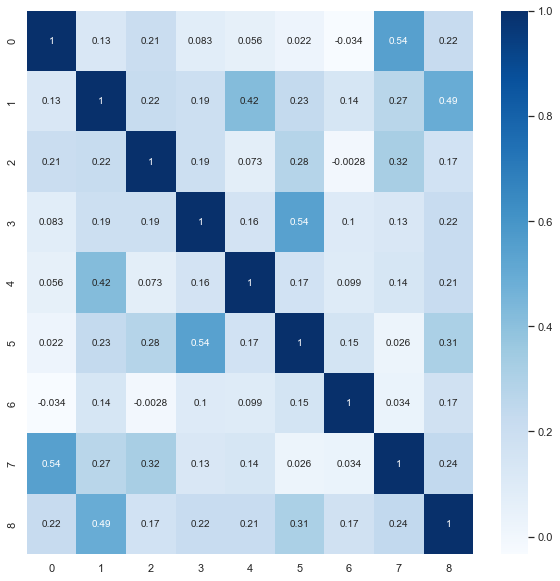

In [81]:
plt.figure(figsize=(10,10))
corl = df.corr()
sns.heatmap(corl, cmap="Blues", annot=True)
print(corl)

**Scatter plot between Triceps skinfold thickness and Body Mass Index**

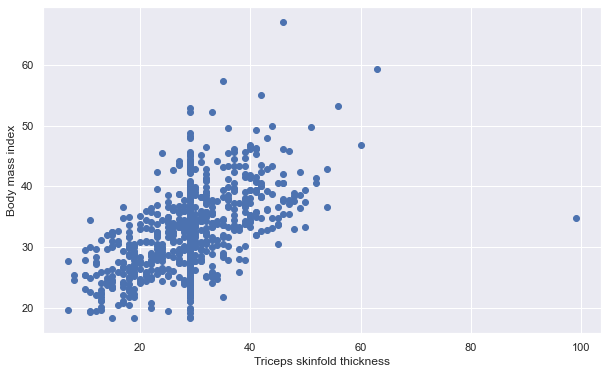

In [82]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df[3], df[5])
ax.set_xlabel('Triceps skinfold thickness')
ax.set_ylabel('Body mass index')
plt.show()